#### Prelude

In [1]:
<< "MaTeX`"
<< "~/Documents/Wolfram/Maxima_Minima.wls"
<< "~/Documents/Wolfram/Optics_Mie.wls"
<< "~/Documents/Wolfram/Optical_functions/Au_JohnsnChristy.wls"

In [5]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

-Graphics-
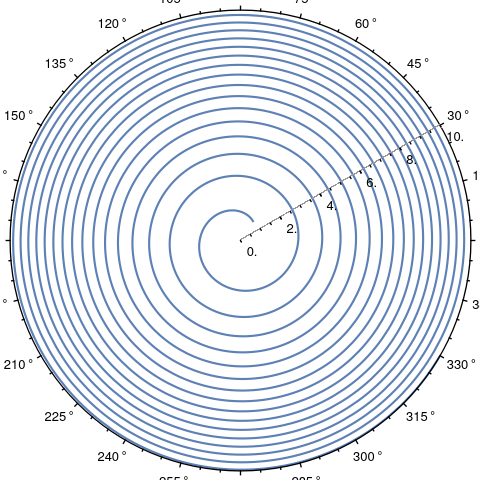

In [12]:
PolarPlot[Sqrt[n], {n, 1, 100}, PolarAxes -> True, 
 PolarAxesOrigin -> {Pi/6, 10}, PolarTicks -> {"Degrees", Automatic}]

### CrosFulls Sections

In [13]:
radius = 5.;

plots = ConstantArray[0, {2, 2}];
ampFactor = 1.;
ar = 1/2.75;

#### No size Correction

In [17]:
nNP = JohnsonChristyAuRef;

wlength = Range[400, 700, 2.5];
max = scaQ = extQ = {0, 0};

scaFunc[lda_] := Map[ampFactor*MieScatteringQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];
extFunc[lda_] := Map[MieExtinctionQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];

In [22]:
i = 1;

nMat = 1. &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{1, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

i++;
nMat = 1.33 &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{10, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

max = Transpose[max];


{-Graphics-, -Graphics-}
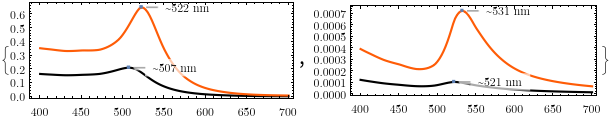

In [33]:
plots[[1]] = MapThread[
                        Show[{
                            ListLinePlot[#, 
                                            AspectRatio -> ar, 
                                            Mesh -> None, 
                                            DataRange -> wlength[[{1, -1}]]
                                        ],
                            ListPlot[Callout[#, "~" <> ToString[IntegerPart@#[[1]]] <> " nm" , Right] & /@ #2]
                             }, 
                             PlotRange -> All] &, {{extQ, scaQ}, max}]

#### Size Correction

In [34]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;

wlength = Range[400, 700, 2.5];
max = scaQ = extQ = {0, 0};

scaFunc[lda_] := Map[ampFactor*MieScatteringQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];
extFunc[lda_] := Map[MieExtinctionQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];

In [39]:
i = 1;

nMat = 1. &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{1, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

i++;
nMat = 1.33 &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{1, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

max = Transpose[max];


{-Graphics-, -Graphics-}
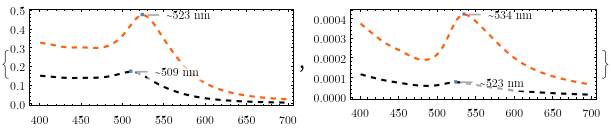

In [50]:
plots[[2]] = MapThread[
                        Show[{
                            ListLinePlot[#, PlotStyle -> {Directive[ColorData[3, 1], Dashed], Directive[ColorData[3, 2], Dashed]},
                                            AspectRatio -> ar, 
                                            Mesh -> None, 
                                            DataRange -> wlength[[{1, -1}]]
                                        ],
                            ListPlot[Callout[#, "~" <> ToString[IntegerPart@#[[1]]] <> " nm" , Right] & /@ #2]
                             }, 
                             PlotRange -> All] &, {{extQ, scaQ}, max}]

#### Semi - final plots

{-Graphics-, -Graphics-}
extinction-12--5nm-Au-in-H2O.pdf
scattering-12--5nm-Au-in-H2O.pdf
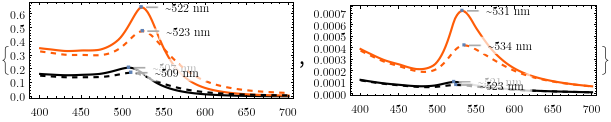

In [51]:
expPlots = Show[#, PlotRange -> All ]& /@  Transpose @ plots
Export["extinction-12--5nm-Au-in-H2O.pdf" , expPlots[[1]] ]
Export["scattering-12--5nm-Au-in-H2O.pdf" , expPlots[[2]] ]

### ScatteringPlots

In [54]:
radius = 12.5;

plots = ConstantArray[0, {2}];
ampFactor = 1.;
ar = 1/2.75;

Flatten@Table[qq*90 + {0, 15, 30 , 45, 60, 75}, {qq,0,3}]
pTiks = {Degree*# + Pi/2, # Degree} &/@ %;

{0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 
 
>   285, 300, 315, 330, 345}

#### Air

In [60]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;
nMat = 1.& ;
wlength = 507;
angle = Range[ 0. , 2 Pi, .01];


m := nNP[wlength] / nMat[wlength] ;
x := (2.*Pi*radius)*nMat[wlength] /wlength;
scaBaloon[ang_] := Map[MieScatteringAmplitude12[x, m, #]&, toMap[ang]];

-Graphics-
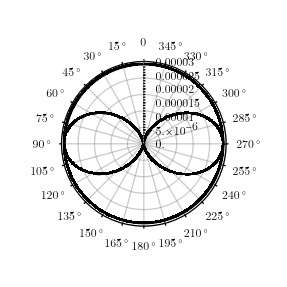

In [67]:
data = Chop[#*Conjugate[#]] &@ scaBaloon[angle];
data = Transpose[data];

plots[[1]] = ListPolarPlot[data, PlotRange->  Max[Flatten@data]*1.8 , PlotStyle -> {Directive[Black], Directive[Black,Dashed]}, PolarTicks -> {pTiks, Automatic} ]

#### H2O

In [70]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;
nMat = 1.33& ;
wlength = 524;
angle = Range[ 0. , 2 Pi, .05];


m := nNP[wlength] / nMat[wlength] ;
x := (2.*Pi*radius)*nMat[wlength] /wlength;
scaBaloon[ang_] := Map[MieScatteringAmplitude12[x, m, #]&, toMap[ang]];

-Graphics-
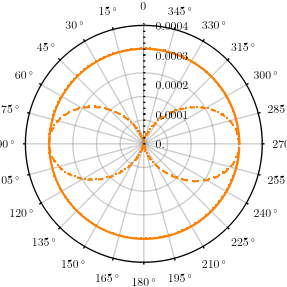

In [77]:
data = Chop[#*Conjugate[#]] &@ scaBaloon[angle];
data = Transpose[data];

plots[[2]] = ListPolarPlot[data, PlotRange->  Max[Flatten@data]*1.5 , PlotStyle -> {Directive[Orange], Directive[Orange,Dashed]}, PolarTicks -> {pTiks, Automatic} ]

### Plots

In [80]:
Export["S-12--5nm-Au-in-Air.pdf" , plots[[1]] ]
Export["S-12--5nm-Au-in-H2O.pdf" , plots[[2]] ]

S-12--5nm-Au-in-Air.pdf
S-12--5nm-Au-in-H2O.pdf